**The link to the article and website about the preprocessing of CC200 fMRI data and about further preprocessing.** <br>
http://dx.doi.org/10.1016/j.neuroimage.2016.06.034 <br>
https://www.nitrc.org/plugins/mwiki/index.php/neurobureau:AthenaPipeline#Functional

## Understanding the ADHD-200 Preprocessed fMRI Data

The dataset consists of preprocessed resting-state fMRI (rs-fMRI) data, structured as .1D files labeled with CC200. These files contain time-series signals extracted from 200 brain regions using the CC200 atlas, a functional brain parcellation scheme. <br>
Based on the ADHD-200 Preprocessed Repository documentation, the dataset has already been motion corrected, spatially normalized, denoised, and filtered using a standard functional MRI preprocessing pipeline. This means that motion-related artifacts have already been addressed as part of the preprocessing. <br>
<br>
##### The Data: Structure and Format.<br>
The fMRI data follows a region-based time-series format, which simplifies whole-brain voxel data into a structured dataset.<br>
<br>
Data Type: Resting-State fMRI (rs-fMRI)
- Resting-state functional MRI (rs-MRI) records spontaneous brain activity when a subject is not performing a task.
- This activity is measured using BOLD (Blood Oxygen Level Dependent) signals, indicating neuronal activity via oxygen consumption.
<br>
##### File Type: .1D files (CC200)
- .1D files store fMRI time-series data in a tab-separated format.
- The CC200 atlas divides the brain into 200 functionally defined regions (ROIs).
- Each .1D file contains one subject's data, with columns representing different brain regions and rows representing different time points. 

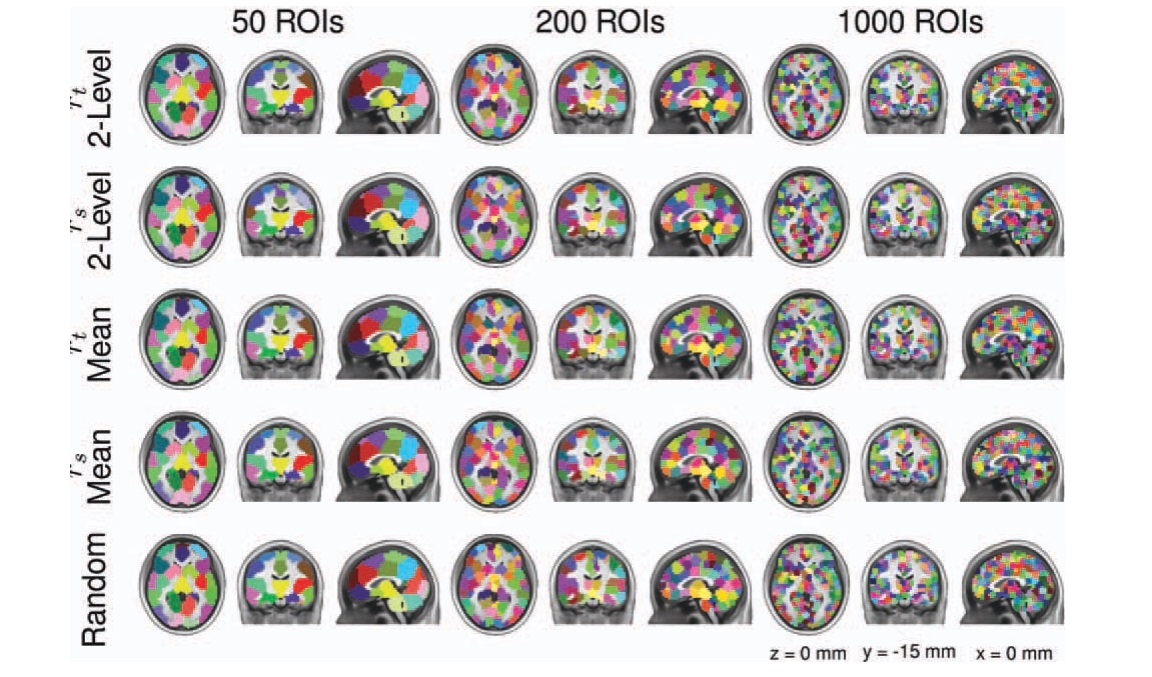

The picture above is from this research paper.
https://www.researchgate.net/publication/51502995_A_whole_brain_fMRI_atlas_generated_via_spatially_constrained_spectral_clustering

#### Data Structure

| Time Point | Mean_1 (ROI_1) | Mean_2 (ROI_2) | Mean_3 (ROI_3) | .... | Mean_200 |
|---|---|---|---|---|---|
| t0 | 0.1244 | -0.4322 | 1.2344 | .... | 0.7655 |
| t1 | 0.1441 | -0.4522 | 1.5464 | .... | 0.8655 |
| t2 | 0.0924 | -0.3322 | 1.6344 | .... | 0.6655 |
| .... | .... | .... | .... | .... | .... |
| t147 | 0.1024 | -0.4922 | 1.2544 | .... | 0.7955 |


- Each Column =  A specific brain region (ROI) (Total: 200 ROIs)
- Each Row = A specific time point during the fMRI scan.
- Each Value = The BOLD signal intensity at a given brain region and time point. 

#### Preprocessing Pipeline: From Importing Data to Functional Connectivity
Since the data has already been preprocessed and motion have been accounted for with the data, the primary step involve functional connectivity computation, feature extraction, and integrating ADHD labels.
<br>
##### Step 1: Import fMRI Data & Phenotypic Labels
- Load .1D files (which stores time-series data for each ROI).ipynb_checkpoints/
- Load phenotypic data, which contains the demographics, medical information, IQ data and ADHD labels.
<br>
##### Step 2: Compute Functional Connectivity (FC)
Functional connectivity (FC) is computed by correlating time series signals between different ROIs.
- For each subjects:
    - Extract 200 ROI time series data.
    - Compute Pearson correlation between every pair of ROIs.
    - Generate a 200 x 200 Functional connectivity matrix.
<br>

Sample Functional Connectivity Matrix
|ROI|	ROI_1	|ROI_2	|ROI_3	|...	|ROI_200|
|---|---|---|---|---|---|
|ROI_1|	1.00|	0.85|	-0.76|	...|	0.45|
|ROI_2|	0.85|	1.00|	-0.92|	...|	-0.30|
|ROI_3	|-0.76	|-0.92	|1.00	|...	|0.80|
|...|	...|	...|	...|	...|	...|
|ROI_200|	0.45|	-0.30|	0.80|	...	|1.00|

##### Step 3: Extract Features for Machine Learning
- The FC matrix contains 200x200 = 40,000 values for each subject which are too many for Machine Learning.
- Extract only the upper triangle of the FC matrix (since it's symmetric matrix), resulting in 19,900 unique features.
- Apply PCA (Principal Component Analysis):
    - Reduces 19,900 features to 50 meaningful components.
    - These 50 componenets become the final features for ML classification.
    - These 50 components will be arranged in 1 row for each subject with ADHD label as a column which contains if the subject has ADHD or is Typically Developing (TD).
<br>

##### Step 4: Train the Machine Learning Model 
- Features (X) = 50 PCA components per subject.
- Target (Y) = ADHD Diagnosis (1 = ADHD, 0 = Typically Developing or Control)
  